In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import os
import time
import json
import glob

import matplotlib.pyplot as plt
from PIL import Image

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

tf.__version__

'2.1.2'

In [2]:
model_path = './saved_model/alexnet-4char-with-upper-letters'

In [3]:
model = tf.keras.models.load_model(model_path)

# Check its architecture
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 120, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 118, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 13, 64)        0     

In [4]:
def format_y(y):
    return ''.join(map(lambda x: chr(int(x)), y))

def predict(image_path):
    im = Image.open(image_path)
    # im = im.resize((H, W))
    im = np.array(im) / 255.0
    im = np.array(im)
    
    y_pred = model.predict(np.array([im]))
    y_pred = tf.math.argmax(y_pred, axis=-1)
    
    print('predict: %s' % format_y(y_pred[0]))
    plt.imshow(im)

predict: KJWE


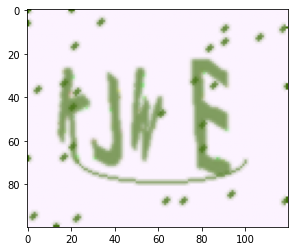

In [5]:
predict('./images/char-4-epoch-1/train/KJWE_a759b2b4-d34a-47b7-908e-9d6346824db9.png')